<a href="https://colab.research.google.com/github/inamansari21/datascience/blob/main/Logistic_regression_bank_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas  as pd
import numpy as np 
import seaborn as  sns
from sklearn.linear_model import LogisticRegression

In [221]:
data=pd.read_csv("bank_data new.csv")
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [222]:
data.shape


(45211, 32)

In [223]:
# Removing NA values in data set
data=data.dropna()
data.shape



(45211, 32)

In [224]:
data.columns


Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [225]:
data.dtypes


age                int64
default            int64
balance            int64
housing            int64
loan               int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutfailure        int64
poutother          int64
poutsuccess        int64
poutunknown        int64
con_cellular       int64
con_telephone      int64
con_unknown        int64
divorced           int64
married            int64
single             int64
joadmin.           int64
joblue.collar      int64
joentrepreneur     int64
johousemaid        int64
jomanagement       int64
joretired          int64
joself.employed    int64
joservices         int64
jostudent          int64
jotechnician       int64
jounemployed       int64
jounknown          int64
y                  int64
dtype: object

In [226]:
data.mean()


age                  40.936210
default               0.018027
balance            1362.272058
housing               0.555838
loan                  0.160226
duration            258.163080
campaign              2.763841
pdays                40.197828
previous              0.580323
poutfailure           0.108403
poutother             0.040698
poutsuccess           0.033421
poutunknown           0.817478
con_cellular          0.647741
con_telephone         0.064276
con_unknown           0.287983
divorced              0.115171
married               0.601933
single                0.282896
joadmin.              0.114375
joblue.collar         0.215257
joentrepreneur        0.032890
johousemaid           0.027427
jomanagement          0.209197
joretired             0.050076
joself.employed       0.034925
joservices            0.091880
jostudent             0.020747
jotechnician          0.168034
jounemployed          0.028820
jounknown             0.006370
y                     0.116985
dtype: f

In [227]:
data.median()


age                 39.0
default              0.0
balance            448.0
housing              1.0
loan                 0.0
duration           180.0
campaign             2.0
pdays               -1.0
previous             0.0
poutfailure          0.0
poutother            0.0
poutsuccess          0.0
poutunknown          1.0
con_cellular         1.0
con_telephone        0.0
con_unknown          0.0
divorced             0.0
married              1.0
single               0.0
joadmin.             0.0
joblue.collar        0.0
joentrepreneur       0.0
johousemaid          0.0
jomanagement         0.0
joretired            0.0
joself.employed      0.0
joservices           0.0
jostudent            0.0
jotechnician         0.0
jounemployed         0.0
jounknown            0.0
y                    0.0
dtype: float64

In [228]:
data.var()


age                1.127581e+02
default            1.770202e-02
balance            9.270599e+06
housing            2.468876e-01
loan               1.345569e-01
duration           6.632057e+04
campaign           9.597733e+00
pdays              1.002577e+04
previous           5.305841e+00
poutfailure        9.665379e-02
poutother          3.904259e-02
poutsuccess        3.230482e-02
poutunknown        1.492110e-01
con_cellular       2.281778e-01
con_telephone      6.014627e-02
con_unknown        2.050533e-01
divorced           1.019090e-01
married            2.396149e-01
single             2.028702e-01
joadmin.           1.012955e-01
joblue.collar      1.689254e-01
joentrepreneur     3.180916e-02
johousemaid        2.667531e-02
jomanagement       1.654372e-01
joretired          4.756972e-02
joself.employed    3.370611e-02
joservices         8.344015e-02
jostudent          2.031717e-02
jotechnician       1.398019e-01
jounemployed       2.799042e-02
jounknown          6.329693e-03
y       

In [229]:
data.std()


age                  10.618762
default               0.133049
balance            3044.765829
housing               0.496878
loan                  0.366820
duration            257.527812
campaign              3.098021
pdays               100.128746
previous              2.303441
poutfailure           0.310892
poutother             0.197592
poutsuccess           0.179735
poutunknown           0.386278
con_cellular          0.477680
con_telephone         0.245247
con_unknown           0.452828
divorced              0.319232
married               0.489505
single                0.450411
joadmin.              0.318269
joblue.collar         0.411005
joentrepreneur        0.178351
johousemaid           0.163326
jomanagement          0.406740
joretired             0.218105
joself.employed       0.183592
joservices            0.288860
jostudent             0.142538
jotechnician          0.373901
jounemployed          0.167303
jounknown             0.079559
y                     0.321406
dtype: f

In [230]:
data.skew()


age                 0.684818
default             7.245375
balance             8.360308
housing            -0.224766
loan                1.852617
duration            3.144318
campaign            4.898650
pdays               2.615715
previous           41.846454
poutfailure         2.519297
poutother           4.649199
poutsuccess         5.192072
poutunknown        -1.643851
con_cellular       -0.618604
con_telephone       3.553497
con_unknown         0.936454
divorced            2.411075
married            -0.416493
single              0.964070
joadmin.            2.423369
joblue.collar       1.385652
joentrepreneur      5.238320
johousemaid         5.787133
jomanagement        1.429986
joretired           4.125939
joself.employed     5.066613
joservices          2.825851
jostudent           6.724846
jotechnician        1.775767
jounemployed        5.632886
jounknown          12.409644
y                   2.383480
dtype: float64

In [231]:
data.kurt()


age                   0.319570
default              50.497694
balance             140.751547
housing              -1.949566
loan                  1.432253
duration             18.153915
campaign             39.249651
pdays                 6.935195
previous           4506.860660
poutfailure           4.347048
poutother            19.615922
poutsuccess          24.958714
poutunknown           0.702278
con_cellular         -1.617401
con_telephone        10.627811
con_unknown          -1.123104
divorced              3.813451
married              -1.826614
single               -1.070617
joadmin.              3.872890
joblue.collar        -0.079971
joentrepreneur       25.441124
johousemaid          31.492300
jomanagement          0.044861
joretired            15.024033
joself.employed      23.671618
joservices            5.985698
jostudent            43.225460
jotechnician          1.153398
jounemployed         29.730717
jounknown           152.005993
y                     3.681142
dtype: f

In [232]:
data.describe()


,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,0.040698,0.033421,0.817478,0.647741,0.064276,0.287983,0.115171,0.601933,0.282896,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,0.197592,0.179735,0.386278,0.477680,0.245247,0.452828,0.319232,0.489505,0.450411,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [234]:
data.isnull().sum()


age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

## Plots and graphs

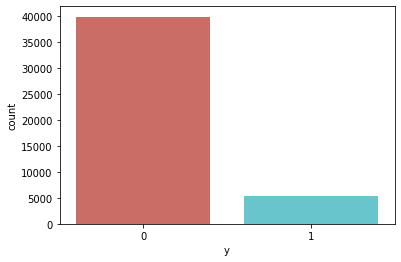

In [235]:
import seaborn as sns
sns.countplot(x='y',data=data,palette='hls')


In [236]:
data.y.unique()


array([0, 1])

The above plot is a variable of "Y" which was target variable which has 40 thousand of 0's and 5 thousand of 1's



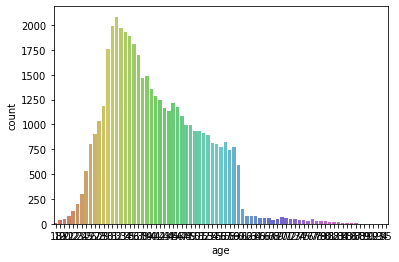

In [237]:
sns.countplot(x='age',palette='hls',data=data)


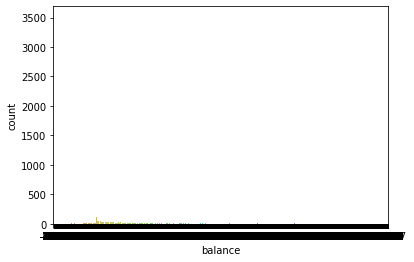

In [238]:
sns.countplot(x='balance',palette='hls',data=data)


In [239]:
y=data.iloc[:,-1:]
y


,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [240]:
x=data.iloc[:,:-1]
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [241]:
from sklearn.linear_model import LogisticRegression


In [242]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]



In [243]:
classifier=LogisticRegression()
classifier.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [244]:
y_pred=classifier.predict(x)
y_pred


array([0, 0, 0, ..., 1, 0, 0])

In [245]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [246]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)


[[39163   759]
 [ 4113  1176]]


In [247]:
((39165+1177)/(39165+757+4112+1177))*100


89.23049700294176

In [248]:
y_proba=classifier.predict_proba(x)
y_proba


array([[0.96486069, 0.03513931],
       [0.97517616, 0.02482384],
       [0.98125395, 0.01874605],
       ...,
       [0.20390838, 0.79609162],
       [0.88702402, 0.11297598],
       [0.92791922, 0.07208078]])

In [249]:
classifier.coef_


array([[-1.77603837e-02, -2.80492674e-02,  2.38074064e-05,
        -1.00872910e+00, -2.83278772e-01,  3.81078739e-03,
        -3.31970120e-01,  2.61010205e-03, -2.24339405e-01,
        -1.91031107e-01, -4.74913669e-02,  4.35153700e-01,
        -6.61035419e-01,  8.88759474e-02,  7.56603582e-02,
        -6.28940499e-01,  2.64468623e-02, -2.43639505e-01,
        -2.47211550e-01, -5.64082302e-02, -3.76185046e-01,
        -3.67715099e-02, -9.57507189e-03,  1.31771851e-02,
         2.46642428e-01, -2.43155124e-02, -1.39884251e-01,
         3.03633178e-02, -1.20531033e-01,  4.24885382e-03,
         4.83467594e-03]])

In [250]:
y_pred


array([0, 0, 0, ..., 1, 0, 0])

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



**Here we can see that Recall and f1-Score of 0 are high enough but when compared to 1 which is pretty less this is all because of Im-Balenced Data**

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,y_pred)
Logit_roc_score


0.6016680982254591

Text(0, 0.5, 'True Positive Rate')

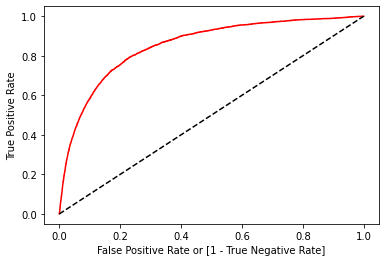

In [253]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_proba[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [254]:
auc


0.6016680982254591

In [255]:
y.value_counts()##Strongly Imbalenced Data


y
0    39922
1     5289
dtype: int64

# Dealing With The Imbalenced data Under Sampleing
creation of New model with Imbalenced data


In [256]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [257]:
from sklearn.model_selection import train_test_split


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [259]:
x_test.shape


(9043, 31)

In [260]:
x_train.shape


(36168, 31)

In [261]:
y_train.shape


(36168, 1)

In [262]:
y_test.shape


(9043, 1)

In [263]:
data.y.value_counts()


0    39922
1     5289
Name: y, dtype: int64

In [264]:
classifier=LogisticRegression()


In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)


In [266]:
y_train.shape


(36168, 1)

In [267]:
y_test.shape


(9043, 1)

In [268]:
x_train.shape


(36168, 31)

In [269]:
x_test.shape


(9043, 31)

In [270]:
classifier.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [271]:
y_pred1=classifier.predict(x_test)
y_pred1


array([0, 0, 0, ..., 0, 0, 0])

In [272]:
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.65      0.28      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [273]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_test,y_pred1)
Logit_roc_score


0.6321681247802767

Text(0, 0.5, 'True Positive Rate')

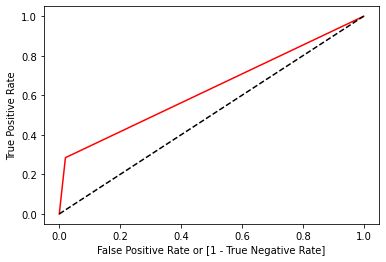

In [274]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

auc = roc_auc_score(y_test, y_pred1)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [275]:
auc


0.6321681247802767

By using the Under Sampling Technique I Got the Accuracy ,Precision ,recall and f1-score very effective and efficient to the model



# SMOTE
SMOTE Technique- Synthetic Minority Over-sampling Technique



In [276]:
x=data.drop('y',axis='columns')
y=data["y"]


In [277]:
y.value_counts()


0    39922
1     5289
Name: y, dtype: int64

In [278]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=1)
x_train_sm,y_train_sm=smote.fit_resample(x,y)


In [279]:
from collections import  Counter
print("Before SMOTE :",Counter(y))
print("After SMOTE :",Counter(y_train_sm))


Before SMOTE : Counter({0: 39922, 1: 5289})
After SMOTE : Counter({0: 39922, 1: 39922})


In [280]:
from sklearn.metrics import accuracy_score
classifier.fit(x_train_sm,y_train_sm)
y_pred=classifier.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [281]:
np.random.random(size=(10))

array([0.80452726, 0.51464765, 0.95669286, 0.95916965, 0.52869331,
       0.54031576, 0.50480557, 0.57375261, 0.69852946, 0.98826971])

In [282]:
((7044+6976)/(7044+940+1009+6976))*100


87.79510301208592

In [283]:
print(accuracy_score(y_test,y_pred))


0.855025986951233


In [284]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7985
           1       0.42      0.65      0.51      1058

    accuracy                           0.86      9043
   macro avg       0.69      0.77      0.71      9043
weighted avg       0.89      0.86      0.87      9043



In [285]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_test,y_pred)
Logit_roc_score


0.7678586858866993

Text(0, 0.5, 'True Positive Rate')

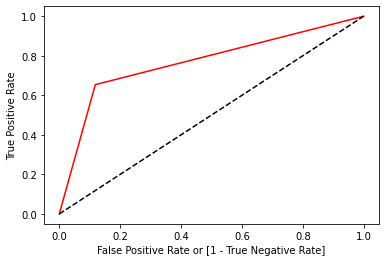

In [286]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [287]:
auc


0.7678586858866993

## Value counts

In [288]:
x=data.drop('y',axis='columns')
y=data["y"]


In [289]:
y.value_counts()


0    39922
1     5289
Name: y, dtype: int64

In [290]:
39922-5289


34633